In [1]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
import fidle.pwk as pwk
import time

In [2]:
# Reconstruct a new model from the final model:
model = tf.keras.models.load_model("saved model")

In [3]:
# Function definition for frame prediction
def predict_frame(img, model):
    img_array = tf.keras.utils.img_to_array(img)
    img_batch = np.expand_dims(img_array, axis=0)
    prediction=(model.predict(img_batch) > 0.5).astype("int32")
    if(prediction[0][0]==1):
        return("Accident Detected")
    else:
        return("No Accident")

In [4]:
# Turn test image into a tensor
test_img_path = 'Accident dataset/noAccident.jpg'
test_img_tensor = tf.io.read_file(test_img_path)
test_img_tensor = tf.image.decode_image(test_img_tensor, channels=3)
test_img_tensor = tf.image.resize(test_img_tensor, [250, 250])
test_img_tensor = tf.cast(test_img_tensor, tf.int32)

In [5]:
# test image from your computer
image=[]
label=[]

img_height = 250
img_width = 250

frame = test_img_tensor
image.append(frame)
label.append(predict_frame(frame, model))

plt.imshow(test_img_tensor.numpy())
print(label)

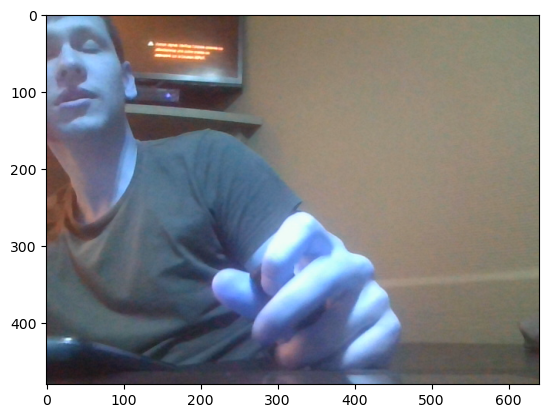

1/1 [==============================] - 1s 1s/step
Accident detected!


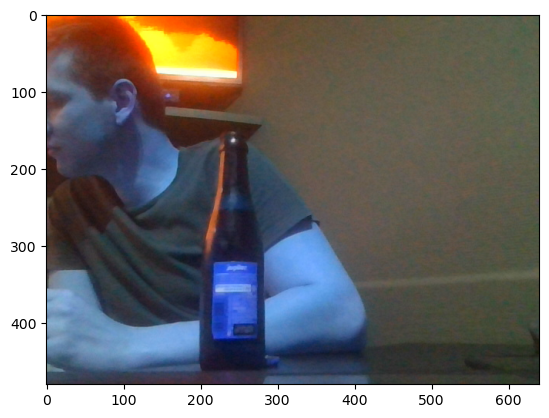

1/1 [==============================] - 0s 105ms/step
Accident detected!


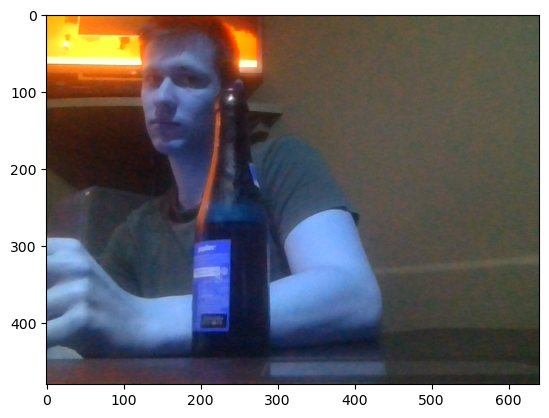

1/1 [==============================] - 0s 56ms/step
Accident detected!


KeyboardInterrupt: 

In [6]:
# main loop 
image = []
label = []

i = 1
cap = cv2.VideoCapture(0)
while True:
    grabbed, frame = cap.read()    
    
    success, encoded_image = cv2.imencode(".jpg", frame)
    resized_frame = cv2.resize(encoded_image, (250, 250))
    
    # Convert encoded_image to bytes
    encoded_bytes = encoded_image.tobytes()
    
    test_img_tensor = tf.image.decode_image(encoded_bytes, channels=3)
    test_img_tensor = tf.image.resize(test_img_tensor, [250, 250])
    test_img_tensor = tf.cast(test_img_tensor, tf.int32)
    
    image.append(frame)
    plt.imshow(frame)
    plt.show()  # Afficher l'image
    
    label.append(predict_frame(test_img_tensor, model))
    
    if label[-1] == "Accident Detected":
        # exec(mail_gps.py)
        print("Accident detected!")
        time.sleep(3)
    else:
        print("C'est OK")
    
    i += 1